# Simple Proportional Control Simulation

Copyright &copy; 2022-2024 [Joshua A. Marshall](https://www.ece.queensu.ca/people/j-marshall)

This simple simulation illustrates **proportional (P) control** in the context of a cruise control application for a simple 1D mobile robot.  

## Import Packages

We use [Numpy](https://numpy.org) for handling arrays and [Matplotlib](https://matplotlib.org) for plotting.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Simulation Setup

Set the simulation time as `SIM_TIME` [s], the sample period as `T` [s] and the mobile robot's mass as `M` [kg].

In [2]:
SIM_TIME = 30.0
T = 0.4
M = 10

Set up an array of simulation times `t` and find the total number of simulation data points `N`.

In [3]:
t = np.arange(0, SIM_TIME, T)
N = np.size(t)

Write a function to model the mobile robot's speed `v` [m/s] as a function of the force input `u` [N].

In [4]:
def vehicle_speed(v, u, T):
    """Discrete-time 1D vehicle speed model."""
    v_new = v + T * 1 / M * u
    return v_new

## Run the Simulation

Set the desired speed (i.e., cruise control set-point).

In [5]:
v_d = 2.0

Initialize the variables and run the simulation in a `for` loop.  Pick the proportional gain `k_P`.

In [6]:
# Initialize some variables
v = np.zeros(N)
u = np.zeros(N)

# Initialize the speed and input
v[0] = 0.0
u[0] = 0.0

# Initialize the controller gain parameter
k_P = 2.0

# For each time step compute the vehicle motion and new input
for k in range(1, N):
    v[k] = vehicle_speed(v[k - 1], u[k - 1], T)
    u[k] = k_P * (v_d - v[k])

## Plot the Simulation Output

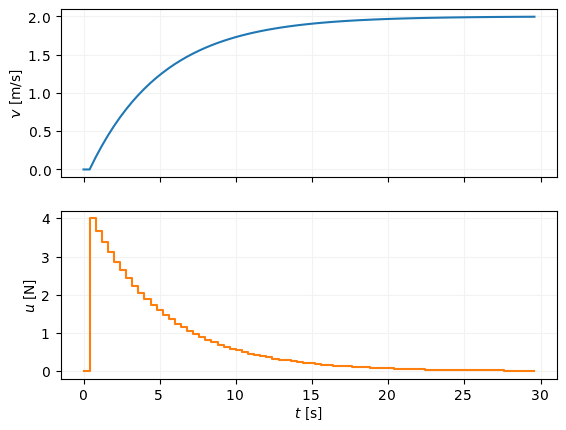

In [7]:
# Optional setup
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{arev,amsmath}")

# Plot the speed and input versus time
fig1 = plt.figure(1)
ax1a = plt.subplot(211)
plt.plot(t, v, "C0")
plt.grid(color="0.95")
plt.ylabel(r"$v$ [m/s]")
plt.setp(ax1a, xticklabels=[])
ax1b = plt.subplot(212)
plt.step(t, u, "C1", where="post")
plt.grid(color="0.95")
plt.ylabel(r"$u$ [N]")
plt.xlabel(r"$t$ [s]")
plt.show()